In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data/Merged_Aneurysm.csv') #import data
df.head() #check data has imported correctly 

,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.0,3722.28,70.275319,13.19376,0.31251,176.44,20.90888,0.0,0.44672,0.001574


In [3]:
df.shape #understand the overall structure of the data

(103, 62)

In [4]:
df.info() #understand the validity of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   case_id                     103 non-null    object 
 1   patient_id                  103 non-null    object 
 2   aneurysmLocation            103 non-null    object 
 3   aneurysmType                103 non-null    object 
 4   ruptureStatus               103 non-null    object 
 5   age                         103 non-null    int64  
 6   sex                         103 non-null    object 
 7   multipleAneurysms           103 non-null    bool   
 8   sacVolume                   103 non-null    float64
 9   sacSurfaceArea              103 non-null    float64
 10  vdcVolume                   103 non-null    float64
 11  vdcSurfaceArea              103 non-null    float64
 12  sacSectionArea              103 non-null    float64
 13  ellipsoidVolume             101 non

In [5]:
df.isna().sum() #find which data columns contain null values

case_id              0
patient_id           0
aneurysmLocation     0
aneurysmType         0
ruptureStatus        0
                    ..
maxTAWSS            95
meanTAWSS           95
minOSI              95
maxOSI              95
meanOSI             95
Length: 62, dtype: int64

In [6]:
df['sacMinPressure'].unique() #investigate the null values for each column

array([    nan,  838.99,  260.48,  148.5 ,  129.76, 1265.8 ,  190.14,
        136.14,  219.44])

In [7]:
df['sacMaxPressure'].unique() 

array([    nan, 3461.6 ,  750.25,  396.04,  287.24, 3270.6 ,  497.14,
        541.65,  516.59])

In [8]:
df_complete = df.copy() #create a copy of the data so as not to alter the original dataset

In [9]:
columns_to_drop = [28,29,30,31,32,33,34,35,36,37,38,51,52,53,54,55,56,57,58,59,60,61] #indicating columns to drop based on analysis of the null values: since there are more null values than useable data, it makes sense to drop these columns.

df_complete.drop(df_complete.columns[columns_to_drop], axis=1, inplace=True)
df_complete.info() #checking that the columns with more null values than useable data have been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   case_id                     103 non-null    object 
 1   patient_id                  103 non-null    object 
 2   aneurysmLocation            103 non-null    object 
 3   aneurysmType                103 non-null    object 
 4   ruptureStatus               103 non-null    object 
 5   age                         103 non-null    int64  
 6   sex                         103 non-null    object 
 7   multipleAneurysms           103 non-null    bool   
 8   sacVolume                   103 non-null    float64
 9   sacSurfaceArea              103 non-null    float64
 10  vdcVolume                   103 non-null    float64
 11  vdcSurfaceArea              103 non-null    float64
 12  sacSectionArea              103 non-null    float64
 13  ellipsoidVolume             101 non

In [10]:
df_complete['ellipsoidVolume'].isna().sum() #investigating the null values in data columns with 101 non-null values as each column non-null values should equal 103

2

In [11]:
df_complete['ellipsoidVolume'].unique()

array([ 77.96022104,  69.25074107,   8.726193  ,   6.18585878,
        25.16578837,  95.47198624, 109.48220591,  19.03688017,
        40.75074271,  42.03816673,  16.19247622, 105.72487322,
       167.04143787, 165.8691324 ,  13.39608042, 211.7792318 ,
        26.84249751,  13.24327656,  18.17526239,  53.73584209,
        17.4499806 ,  23.01823697,  15.775895  , 133.95026639,
        84.9293163 , 225.9845477 ,  44.79913696,  21.06361627,
        44.6111359 ,  21.94121003,  35.56312518,  59.25914328,
        38.03147682, 225.29712549, 189.53211779, 669.20647272,
       797.22037369,  25.67352274, 184.26887289, 931.85121912,
       392.71894356,  20.0733611 , 372.86962477,  63.72830172,
       338.79542602,  73.2926897 , 118.66721053,   8.7970532 ,
        10.91510877,  38.51043381,   9.84908257,  55.46625339,
       185.8834768 , 182.88185275,  37.24444672, 142.53715138,
                nan, 176.43262418,  61.58616892,  45.81342993,
       297.43536356, 123.27386986,  21.96465465,  22.28

In [13]:
df_complete['ellipsoidVolume'].fillna(0.0, inplace=True) #replacing the null value with 0.0 so that analysis can still be completed
df_complete['ellipsoidVolume'].unique() #checking the null values have been replaced

array([ 77.96022104,  69.25074107,   8.726193  ,   6.18585878,
        25.16578837,  95.47198624, 109.48220591,  19.03688017,
        40.75074271,  42.03816673,  16.19247622, 105.72487322,
       167.04143787, 165.8691324 ,  13.39608042, 211.7792318 ,
        26.84249751,  13.24327656,  18.17526239,  53.73584209,
        17.4499806 ,  23.01823697,  15.775895  , 133.95026639,
        84.9293163 , 225.9845477 ,  44.79913696,  21.06361627,
        44.6111359 ,  21.94121003,  35.56312518,  59.25914328,
        38.03147682, 225.29712549, 189.53211779, 669.20647272,
       797.22037369,  25.67352274, 184.26887289, 931.85121912,
       392.71894356,  20.0733611 , 372.86962477,  63.72830172,
       338.79542602,  73.2926897 , 118.66721053,   8.7970532 ,
        10.91510877,  38.51043381,   9.84908257,  55.46625339,
       185.8834768 , 182.88185275,  37.24444672, 142.53715138,
         0.        , 176.43262418,  61.58616892,  45.81342993,
       297.43536356, 123.27386986,  21.96465465,  22.28

In [14]:
df_complete['ellipsoidVolume'].isna().sum()  #checking the null values have been replaced

0

In [15]:
df_complete['ellipsoidMaxSemiaxis'].isna().sum()  #repeating the process

2

In [16]:
df_complete['ellipsoidMaxSemiaxis'].unique()

array([3.5091, 4.3838, 1.4895, 1.5687, 2.5156, 3.8392, 3.9823, 2.184 ,
       2.6921, 3.132 , 2.1088, 6.6009, 3.6798, 4.8564, 1.5992, 4.2507,
       2.7009, 2.128 , 2.2478, 2.675 , 2.6402, 2.2655, 2.2818, 4.0227,
       4.7878, 4.6812, 2.9914, 2.1487, 2.6157, 3.6489, 2.2996, 4.2867,
       2.5742, 4.5847, 4.1489, 6.696 , 7.2366, 3.193 , 5.086 , 6.7952,
       5.2535, 2.0089, 4.9943, 2.7859, 5.6623, 3.151 , 3.2822, 1.5934,
       1.8245, 2.4611, 1.7037, 3.4401, 4.5047, 4.9221, 3.4744, 4.8852,
          nan, 4.2108, 3.1109, 2.8275, 4.9784, 3.9351, 3.0253, 3.1312,
       8.8238, 4.371 , 2.5086, 2.7213, 2.0327, 2.9145, 2.1844, 3.948 ,
       5.1788, 1.6496, 3.854 , 1.5884, 6.5787, 3.5761, 1.6486, 2.3832,
       2.393 , 3.138 , 2.294 , 3.94  , 6.4526, 2.7403, 4.5027, 3.8457,
       2.0706, 5.5678, 2.7881, 2.973 , 5.2302, 3.4169, 3.1781, 4.9782,
       3.2876, 2.7874, 5.1981, 3.1279, 6.1279, 1.941 ])

In [17]:
df_complete['ellipsoidMaxSemiaxis'].fillna(0.0, inplace=True)

In [18]:
df_complete['ellipsoidMaxSemiaxis'].isna().sum()

0

In [19]:
df_complete['ellipsoidMidSemiaxis'].isna().sum()

2

In [20]:
df_complete['ellipsoidMidSemiaxis'].unique()

array([2.3718, 2.1032, 1.2775, 1.0935, 1.6261, 2.5178, 3.3306, 1.5066,
       1.9785, 1.9542, 1.5304, 2.0763, 3.4301, 3.0468, 1.5296, 3.8847,
       1.5975, 1.283 , 1.5423, 2.298 , 1.4013, 2.1515, 1.3406, 3.0024,
       2.4839, 3.5082, 1.9802, 1.7396, 2.0666, 1.215 , 1.9679, 1.8677,
       1.9657, 3.8236, 3.5589, 5.2108, 5.3575, 1.431 , 3.0712, 6.0386,
       4.5654, 1.6911, 4.3261, 2.6698, 4.5249, 2.5676, 3.1469, 1.1585,
       1.2251, 2.045 , 1.2849, 2.1012, 3.2664, 3.1033, 1.6579, 2.7254,
          nan, 3.3272, 2.4102, 2.0683, 3.8318, 2.8007, 1.4456, 1.3278,
       5.1275, 3.7   , 1.8066, 2.4321, 1.962 , 2.5115, 1.766 , 2.1523,
       5.0366, 1.3429, 3.0657, 1.0376, 4.9791, 3.097 , 1.4844, 1.5822,
       2.088 , 2.1605, 1.2211, 3.1813, 3.0166, 1.9017, 3.7014, 3.7413,
       1.2155, 3.1385, 2.2356, 2.2918, 3.7912, 3.0646, 1.5748, 4.5829,
       2.5523, 2.4975, 4.0872, 2.412 , 5.9223, 1.6244])

In [21]:
df_complete['ellipsoidMidSemiaxis'].fillna(0.0, inplace=True)

In [22]:
df_complete['ellipsoidMidSemiaxis'].isna().sum()

0

In [23]:
df_complete['ellipsoidMinSemiaxis'].isna().sum()

2

In [24]:
df_complete['ellipsoidMinSemiaxis'].unique()

array([2.2362 , 1.7931 , 1.0948 , 0.8609 , 1.4687 , 2.3579 , 1.9706 ,
       1.3812 , 1.8265 , 1.6397 , 1.1978 , 1.8416 , 3.1594 , 2.6762 ,
       1.3074 , 3.0618 , 1.4852 , 1.158  , 1.2516 , 2.0869 , 1.126  ,
       1.1274 , 1.2312 , 2.6477 , 1.7049 , 3.2851 , 1.8055 , 1.3453 ,
       1.9702 , 1.1815 , 1.8761 , 1.767  , 1.7943 , 3.0682 , 3.0644 ,
       4.5788 , 4.909  , 1.3414 , 2.8163 , 5.4215 , 3.909  , 1.4106 ,
       4.12   , 2.0455 , 3.1568 , 2.1627 , 2.7428 , 1.1377 , 1.1658 ,
       1.8267 , 1.0741 , 1.8319 , 3.0159 , 2.8583 , 1.5436 , 2.5558 ,
           nan, 3.0064 , 1.9609 , 1.8702 , 3.7223 , 2.6703 , 1.199  ,
       1.2794 , 4.9813 , 2.5982 , 1.4084 , 2.3056 , 1.5678 , 1.9159 ,
       1.4997 , 1.9715 , 4.0374 , 0.89754, 2.8764 , 0.97176, 4.4362 ,
       2.7895 , 0.78813, 1.1625 , 1.3389 , 1.8668 , 1.1094 , 2.6739 ,
       2.2764 , 1.5446 , 3.3283 , 3.0913 , 0.9696 , 2.5566 , 1.9521 ,
       1.5164 , 3.4401 , 2.7983 , 1.4153 , 4.0747 , 2.1879 , 1.8621 ,
       3.4719 , 1.97

In [25]:
df_complete['ellipsoidMinSemiaxis'].fillna(0.0, inplace=True)

In [26]:
df_complete['ellipsoidMinSemiaxis'].isna().sum()

0

In [27]:
df_complete.isna().sum() #checking for any null values throughout the data

case_id                       0
patient_id                    0
aneurysmLocation              0
aneurysmType                  0
ruptureStatus                 0
age                           0
sex                           0
multipleAneurysms             0
sacVolume                     0
sacSurfaceArea                0
vdcVolume                     0
vdcSurfaceArea                0
sacSectionArea                0
ellipsoidVolume               0
ellipsoidMaxSemiaxis          0
ellipsoidMidSemiaxis          0
ellipsoidMinSemiaxis          0
sacCenterlineLength           0
ostiumSectionArea             0
ostiumSectionPerimeter        0
ostiumMinSize                 0
ostiumMaxSize                 0
ostiumShapeFactor             0
aspectRatio_star              0
sizeRatio_star                0
vesselDiameter                0
neckVesselAngle               0
sacVesselAngle                0
vesselName                    0
length                        0
meanRadius                    0
meanCurv

In [28]:
df_complete.describe() #now that the data has been cleaned, an overall description before starting analysis is useful to understand where to begin analysis

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,meanRadius,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,54.572816,207.726978,145.022975,187.990480,129.519595,31.697933,135.131952,3.497436,2.539008,2.178185,...,1.474386,0.099481,0.556424,0.401280,1.122792,1.855085,0.235874,105.066115,124.941757,20.058769
std,13.779497,279.394028,133.633109,255.272818,119.365392,28.937416,192.717709,1.539806,1.217224,1.093977,...,0.437045,0.054603,0.729857,0.449462,0.279537,0.662283,0.165008,148.804650,27.790898,9.896768
min,24.000000,2.339496,7.333407,2.121879,6.495522,1.541592,0.000000,0.000000,0.000000,0.000000,...,0.652828,0.015622,0.143478,0.000206,0.567848,0.791106,0.026696,0.519942,61.651005,2.903025
25%,43.000000,38.104803,51.113444,35.284619,49.519521,10.677713,22.649715,2.388100,1.610950,1.363250,...,1.108824,0.046638,0.224395,0.018611,0.927876,1.312019,0.088940,5.357929,107.204839,12.493163
50%,55.000000,92.021799,92.777085,86.406187,83.265224,20.560135,58.743347,3.151000,2.235600,1.876100,...,1.360054,0.092345,0.291338,0.085283,1.103461,1.733104,0.172543,52.035705,118.960926,18.823877
75%,64.500000,274.308487,203.174499,245.624382,176.754502,44.587280,176.222604,4.443250,3.164100,2.807300,...,1.858446,0.149473,0.487759,0.759392,1.333959,2.433230,0.363866,149.755312,143.840369,26.780391
max,85.000000,1312.025948,625.717664,1223.412403,583.439703,131.281126,944.044860,8.823800,6.038600,5.421500,...,2.568808,0.205422,4.007590,1.680023,1.818971,3.561417,0.616548,927.688797,209.673523,44.934416


In [29]:
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations
sns.set(palette='pastel')
!pip install bokeh
from bokeh.plotting import figure, show, output_notebook 
from bokeh.models import LinearAxis, Range1d, HoverTool
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import plotly.express as px
import matplotlib.cm as cm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [33]:
#understanding the distribution of participants in the study
value_counts = df_complete['sex'].value_counts()
gender_percentage = ((value_counts / value_counts.sum()) * 100).round()
gender_percentage

sex
F    63.0
M    37.0
Name: count, dtype: float64

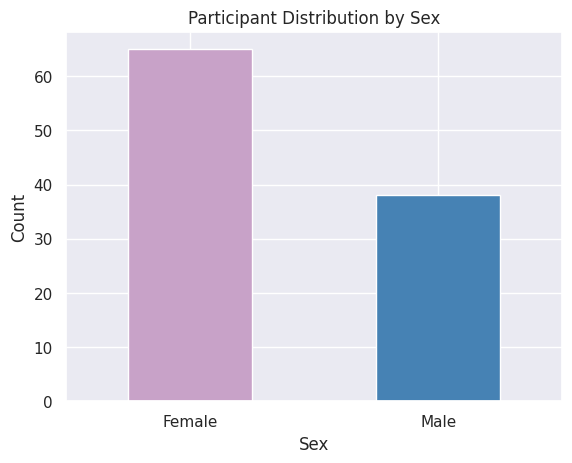

In [35]:
#creating a simplae bar chart for a visual
custom_palette = ["#C8A2C8", "#4682B4"]
df_complete['sex'].value_counts().plot(kind='bar', color=custom_palette)

# Add axis labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Participant Distribution by Sex')

# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)

# Show the plot
plt.show()

In [36]:
#grouping the data by age
df_age = df_complete.groupby(['age']).describe()
df_age

sacVolume                                                              \
        count        mean         std         min         25%         50%   
age                                                                         
24        1.0   40.150163         NaN   40.150163   40.150163   40.150163   
26        1.0   37.934454         NaN   37.934454   37.934454   37.934454   
28        1.0   35.134328         NaN   35.134328   35.134328   35.134328   
32        2.0  104.451826  135.082645    8.933972   56.692899  104.451826   
33        1.0   86.226352         NaN   86.226352   86.226352   86.226352   
35        3.0  171.102651   47.523871  119.002032  150.616558  182.231085   
36        3.0   51.438104   45.445368   23.534307   25.218227   26.902147   
38        2.0   96.802944   24.439586   79.521548   88.162246   96.802944   
39        1.0   92.021799         NaN   92.021799   92.021799   92.021799   
41        2.0  232.769377  244.801670   59.668457  146.218917  232.769377   
42        6.0  228.302874  160.414984   27.389526   95.219008  277.056312   
43        5.0   39.975203   26.990739   12.740609   18.646314   33.415004   
44        1.0  189.890341         NaN  189.890341  189.890341  189.890341   
45        3.0  321.401461  181.902516  166.768050  221.190475  275.612900   
47        1.0   35.656255         NaN   35.656255   35.656255   35.656255   
48        3.0   40.825378   24.874550   24.861696   26.495044   28.128393   
49        5.0   91.488712   92.147661   13.471487   13.538769   48.623808   
51        4.0   52.314983   50.287572    6.555918   13.757523   44.528582   
52        2.0  645.293914  876.526086   25.496375  335.395145  645.293914   
53        3.0   86.460109   41.441128   42.805124   67.060361   91.315599   
54        1.0   45.298640         NaN   45.298640   45.298640   45.298640   
55        2.0  178.795061  201.911906   36.021783  107.408422  178.795061   
56        3.0  507.541743  702.000960   19.222814  105.299640  191.376465   
57        1.0  923.197425         NaN  923.197425  923.197425  923.197425   
58        1.0   99.421240         NaN   99.421240   99.421240   99.421240   
59        6.0  435.851464  519.046928   16.448396   55.028995  183.666143   
60        1.0    9.376307         NaN    9.376307    9.376307    9.376307   
61        2.0  433.741418  227.316933  273.004073  353.372746  433.741418   
62        4.0  240.177790  224.894543   59.272781   66.314222  183.907821   
63        3.0   26.802162   31.755004    2.339496    8.858946   15.378395   
64        3.0  256.173020  162.471384   68.820051  205.118754  341.417456   
65        2.0  138.155713  136.137612   41.891885   90.023799  138.155713   
66        2.0  304.566128  294.612208   96.243838  200.404983  304.566128   
67        2.0  461.350003   34.678746  436.828426  449.089215  461.350003   
68        3.0  111.224486  128.191882   31.027451   37.301566   43.575681   
69        1.0  347.047594         NaN  347.047594  347.047594  347.047594   
71        2.0  177.620297  111.640253   98.678717  138.149507  177.620297   
72        1.0  656.896755         NaN  656.896755  656.896755  656.896755   
73        1.0   30.808869         NaN   30.808869   30.808869   30.808869   
74        7.0  273.365477  413.540904   19.312060   67.131228  106.445366   
77        2.0   57.650383   27.400713   38.275152   47.962768   57.650383   
78        1.0  244.530716         NaN  244.530716  244.530716  244.530716   
84        1.0   94.271201         NaN   94.271201   94.271201   94.271201   
85        1.0  320.939768         NaN  320.939768  320.939768  320.939768   

                             sacSurfaceArea              ...  \
            75%          max          count        mean  ...   
age                                                      ...   
24    40.150163    40.150163            1.0   61.172056  ...   
26    37.934454    37.934454            1.0   54.844592  ...   
28    35.134328    35.134328            1.0   48.831770  ...   


In [40]:
#understanding the difference in mean age between the sexes
mean_age_per_sex = df_complete.groupby('sex')['age'].mean().round()
mean_age_per_sex

sex
F    54.0
M    56.0
Name: age, dtype: float64

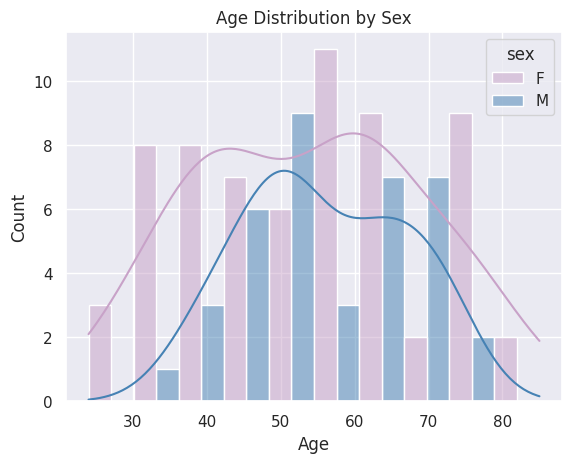

In [43]:
#since the mean age is quite similar, a histplot may be better for understanding age distribution
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'} 
sns.histplot(
    data=df_complete, 
    x='age', 
    bins=int(len(df_complete)/10),  
    hue='sex', 
    multiple='dodge',
    palette = sex_colors,
    kde=True
)

# Add axis titles and a plot title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex')

# Show the plot
plt.show()

In [44]:
#investigating the prevalence of aneurysm location for each sex 
gender_location = df_complete.groupby('aneurysmLocation')['sex'].value_counts(normalize=True).mul(100).round().rename('percentage').reset_index()
gender_location


,aneurysmLocation,sex,percentage
0,ACA,M,54.0
1,ACA,F,46.0
2,BAS,M,57.0
3,BAS,F,43.0
4,ICA,F,85.0
5,ICA,M,15.0
6,MCA,M,54.0
7,MCA,F,46.0


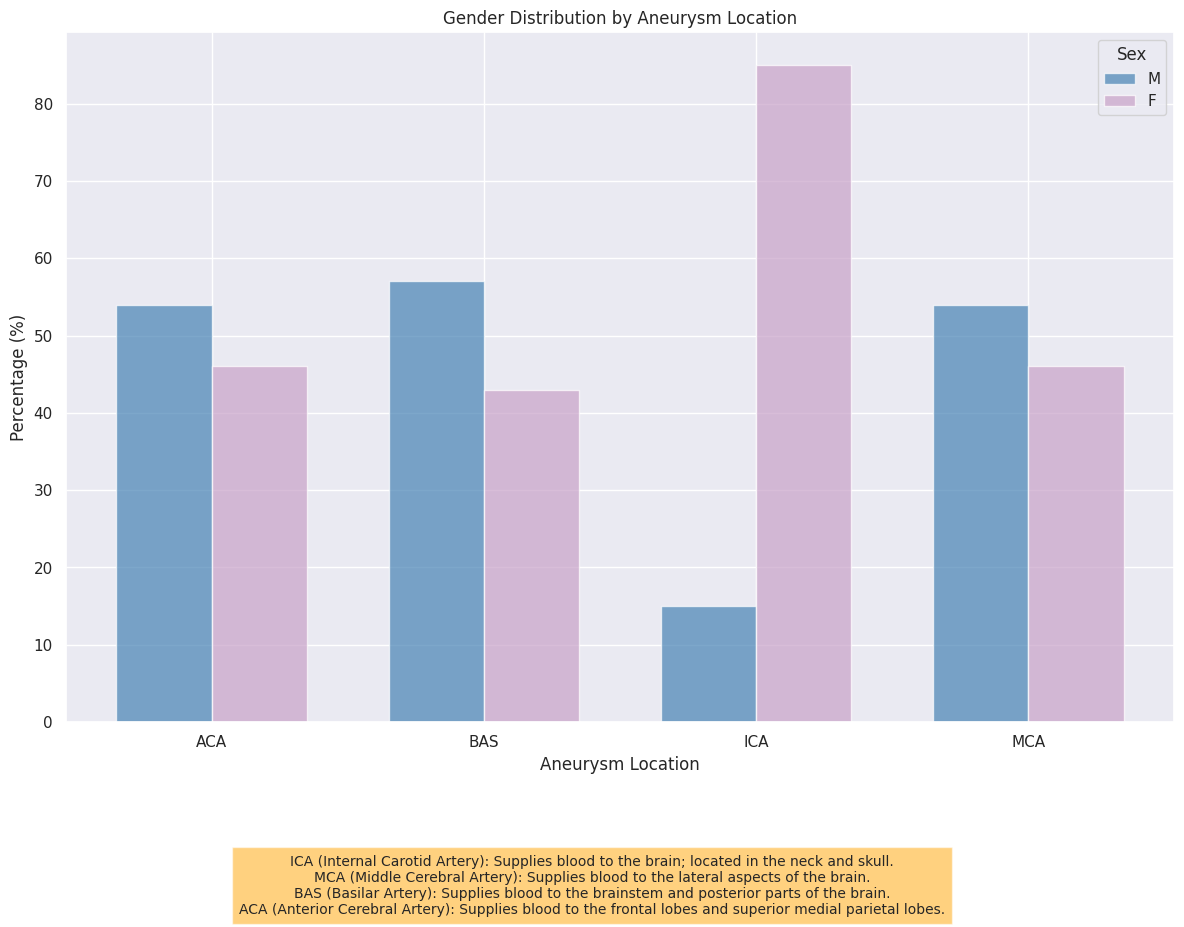

In [47]:
#visualising these percentages
# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate bar width and positions
bar_width = 0.35
locations = gender_location['aneurysmLocation'].unique()
x = np.arange(len(locations))

# Plot bars for each sex
for i, sex in enumerate(gender_location['sex'].unique()):
    sex_data = gender_location[gender_location['sex'] == sex]
    ax.bar(x + (i * bar_width), sex_data['percentage'], bar_width, label=sex, color=sex_colors[sex], alpha=0.7)

# Add labels and title
ax.set_xlabel('Aneurysm Location')
ax.set_ylabel('Percentage (%)')
ax.set_title('Gender Distribution by Aneurysm Location')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(locations)

# Add legend
ax.legend(title='Sex')

# Add definitions for aneurysm locations
definitions = (
    "ICA (Internal Carotid Artery): Supplies blood to the brain; located in the neck and skull.\n"
    "MCA (Middle Cerebral Artery): Supplies blood to the lateral aspects of the brain.\n"
    "BAS (Basilar Artery): Supplies blood to the brainstem and posterior parts of the brain.\n"
    "ACA (Anterior Cerebral Artery): Supplies blood to the frontal lobes and superior medial parietal lobes."
)

# Add text below the plot
plt.figtext(0.5, -0.15, definitions, wrap=True, horizontalalignment='center', fontsize=10, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [82]:
#the graph shows the percentage of cases between the sexes overall, however separating the data may highlight significant insights 

female_data = df_complete[df_complete['sex'] == 'F']

female_data.describe()

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,meanRadius,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,53.784615,207.873641,143.066522,190.034848,128.531663,31.159395,135.907997,3.389017,2.514109,2.161283,...,1.563882,0.116748,0.537490,0.529373,1.145677,2.002794,0.284539,112.628375,119.380158,18.803079
std,15.288366,296.494555,139.541467,273.862845,125.268610,29.493522,208.161129,1.622442,1.247463,1.128961,...,0.459914,0.052333,0.782863,0.462875,0.291918,0.701995,0.165933,161.415326,25.903146,10.172171
min,24.000000,2.339496,7.333407,2.121879,6.495522,1.541592,0.000000,0.000000,0.000000,0.000000,...,0.652828,0.015828,0.165137,0.000206,0.567848,0.791106,0.026696,0.846662,61.651005,2.903025
25%,42.000000,38.275152,50.420657,35.903048,48.961648,9.913781,22.281192,2.299600,1.626100,1.406300,...,1.123629,0.071266,0.218960,0.049352,0.919592,1.330984,0.111107,7.735047,103.868366,9.841830
50%,56.000000,86.226352,89.535872,74.905673,76.584075,21.938237,54.299571,3.025300,2.291800,1.915900,...,1.681964,0.135287,0.286862,0.584293,1.121605,2.033175,0.299136,68.812291,113.718235,18.213850
75%,64.000000,264.735910,186.897136,252.842357,168.433663,42.200674,167.041438,4.250700,3.138500,2.676200,...,1.909695,0.155843,0.468711,0.837999,1.375834,2.590426,0.413733,159.357667,134.226963,26.073153
max,85.000000,1312.025948,625.717664,1223.412403,583.439703,131.281126,944.044860,8.823800,6.038600,5.421500,...,2.568808,0.205422,4.007590,1.680023,1.767779,3.561417,0.616548,927.688797,185.431347,42.552220


In [109]:
percentage_female= female_data['aneurysmLocation'].value_counts(normalize=True).mul(100).round()
percentage_female

aneurysmLocation
ICA    60.0
MCA    18.0
ACA    17.0
BAS     5.0
Name: proportion, dtype: float64

In [ ]:
#this data shows that ICA is the most prominent case amongst females

In [89]:
#separating male data
male_data = df_complete[df_complete['sex'] == 'M']

male_data.describe()

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,meanRadius,meanCurvature,meanTorsion,tortuosity,minRadius,maxRadius,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,55.921053,207.476107,148.369539,184.493536,131.209478,32.619118,133.804506,3.682889,2.581597,2.207096,...,1.321301,0.069946,0.588813,0.182173,1.083647,1.602425,0.152631,92.130671,134.455020,22.206660
std,10.778812,251.269382,124.621098,223.362408,110.138923,28.327007,165.627236,1.388203,1.178903,1.045590,...,0.350069,0.045411,0.637718,0.328903,0.255970,0.502858,0.127110,125.308092,28.657425,9.139192
min,36.000000,15.378395,24.830377,14.451785,23.292096,5.711777,8.078909,1.648600,1.215000,0.788130,...,0.746893,0.015622,0.143478,0.001496,0.625822,0.870420,0.027604,0.519942,91.449514,7.014381
25%,48.250000,37.717618,53.925663,35.504663,51.441761,11.063997,23.682058,2.525000,1.550425,1.351350,...,1.079579,0.039525,0.250159,0.009395,0.961385,1.286701,0.074632,4.127006,113.489439,17.305100
50%,54.000000,106.162785,102.688309,99.347247,96.541514,19.521070,65.879204,3.428500,2.151900,1.836750,...,1.268519,0.051152,0.377294,0.021719,1.099368,1.442470,0.104622,36.960466,127.417404,21.831206
75%,64.500000,293.268930,214.756719,230.119419,184.905482,52.030233,181.269546,4.860850,3.236525,2.969375,...,1.472266,0.090874,0.547500,0.112236,1.214208,1.753428,0.168656,121.692244,153.204107,28.165559
max,74.000000,1265.091454,614.380257,1096.594217,534.355080,124.516878,797.220374,7.236600,5.357500,4.909000,...,2.362150,0.176061,2.902317,1.028055,1.818971,3.050831,0.572103,532.505151,209.673523,44.934416


In [108]:
percentage_male = male_data['aneurysmLocation'].value_counts(normalize=True).mul(100).round()
percentage_male

aneurysmLocation
MCA    37.0
ACA    34.0
ICA    18.0
BAS    11.0
Name: proportion, dtype: float64

In [ ]:
#this data shows that MCA is the most prominent location for males, not BAS. Therefore the graph is misleading as it is showing BAS as the most prominent but this is only in comparison to females. 

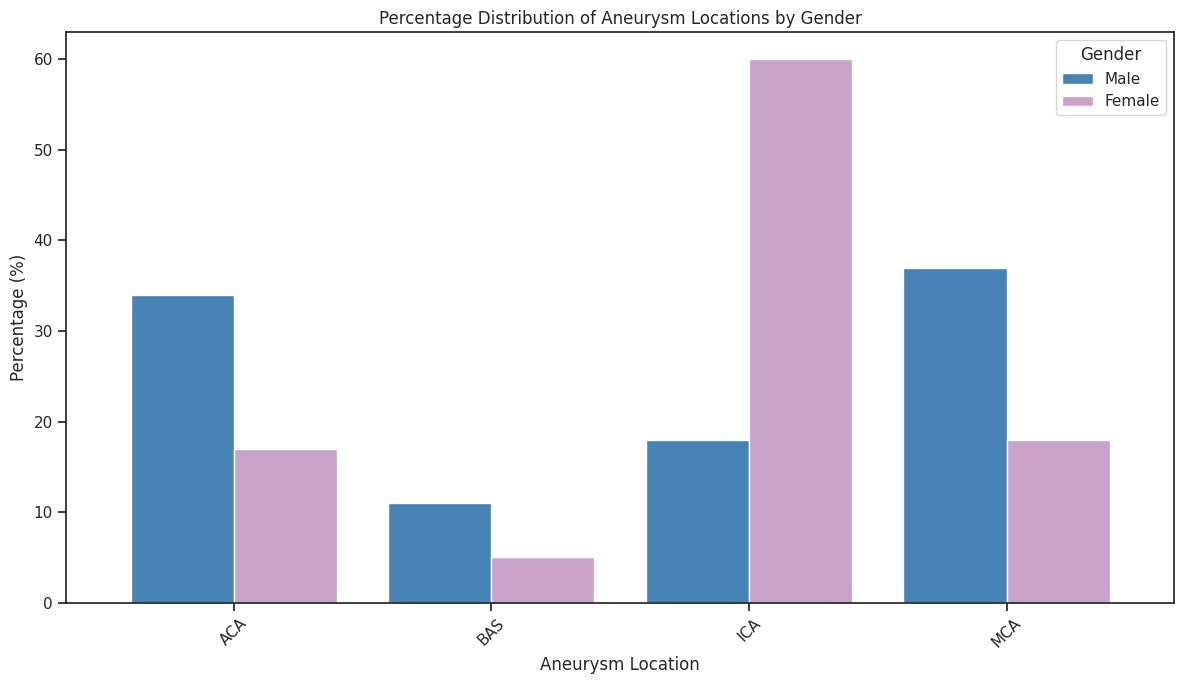

In [110]:
#now to combine the separated data to one bar chart, and it will accurately show the prominent aneurysm location for males and females

combined_data = pd.DataFrame({
    'Male': percentage_male,
    'Female': percentage_female
}).fillna(0)  # Fill NaN values with 0 for locations that might not be present in both datasets

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
combined_data.plot(kind='bar', ax=ax, color=['#4682B4', '#C8A2C8'], width=0.8)  # Light blue and light purple

# Adding title and labels
plt.title('Percentage Distribution of Aneurysm Locations by Gender')
plt.xlabel('Aneurysm Location')
plt.ylabel('Percentage (%)')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

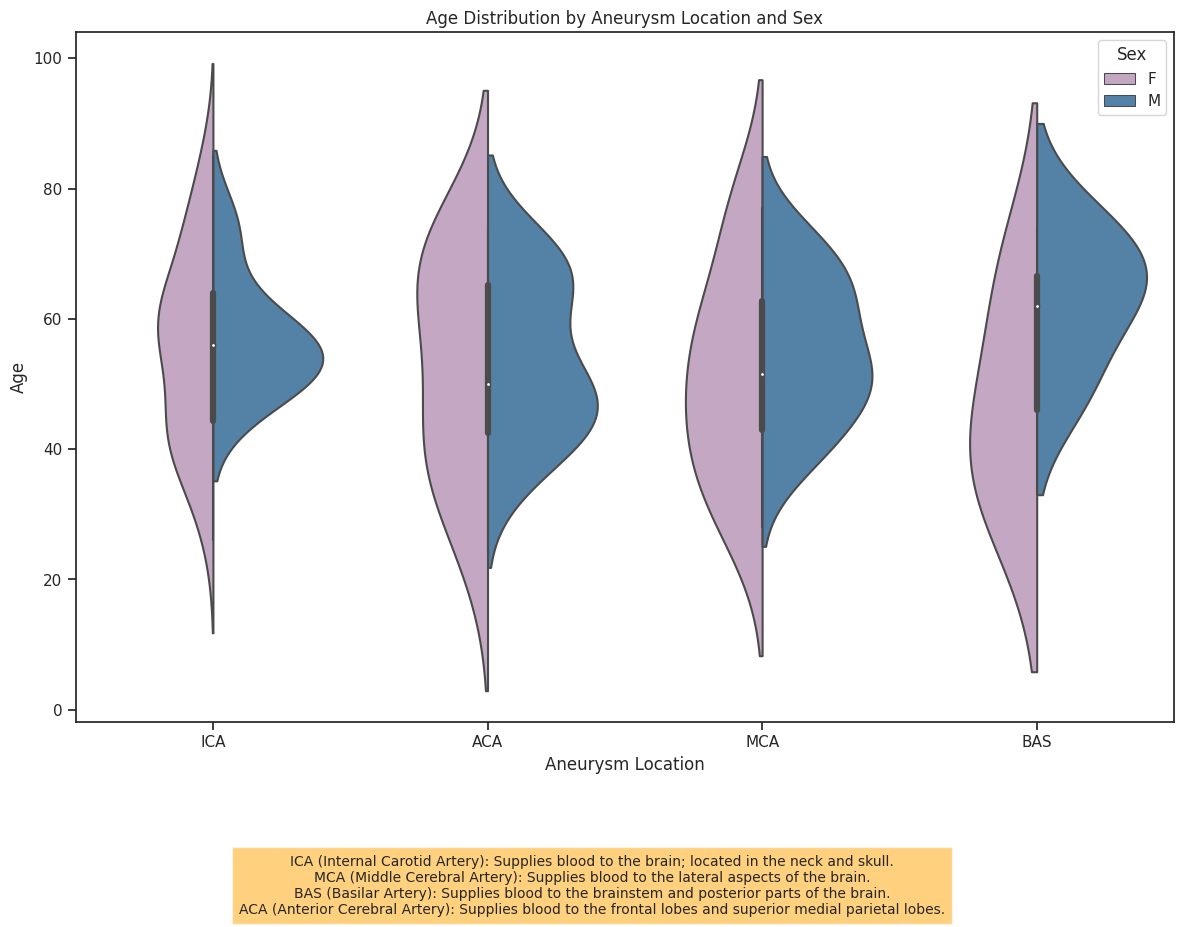

In [81]:
# investigating the distribution of age and sex in correspondance with aneurysm location using a violin plot
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'} 
sns.set_style("ticks")
plt.figure(figsize=(12, 8))
sns.violinplot(x='aneurysmLocation', y='age', hue='sex', data=df_complete, split=True, palette= sex_colors,)
plt.title('Age Distribution by Aneurysm Location and Sex')
plt.xlabel('Aneurysm Location')
plt.ylabel('Age')
plt.legend(title='Sex')

# Add definitions for aneurysm locations
definitions = (
    "ICA (Internal Carotid Artery): Supplies blood to the brain; located in the neck and skull.\n"
    "MCA (Middle Cerebral Artery): Supplies blood to the lateral aspects of the brain.\n"
    "BAS (Basilar Artery): Supplies blood to the brainstem and posterior parts of the brain.\n"
    "ACA (Anterior Cerebral Artery): Supplies blood to the frontal lobes and superior medial parietal lobes."
)
plt.figtext(0.5, -0.15, definitions, wrap=True, horizontalalignment='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

In [122]:
#investigating type distribution between the sexes
female_type = female_data['aneurysmType'].value_counts(normalize=True).mul(100).round()
female_type

aneurysmType
LAT    52.0
TER    48.0
Name: proportion, dtype: float64

In [123]:
male_type = male_data['aneurysmType'].value_counts(normalize=True).mul(100).round()
male_type

aneurysmType
TER    84.0
LAT    16.0
Name: proportion, dtype: float64

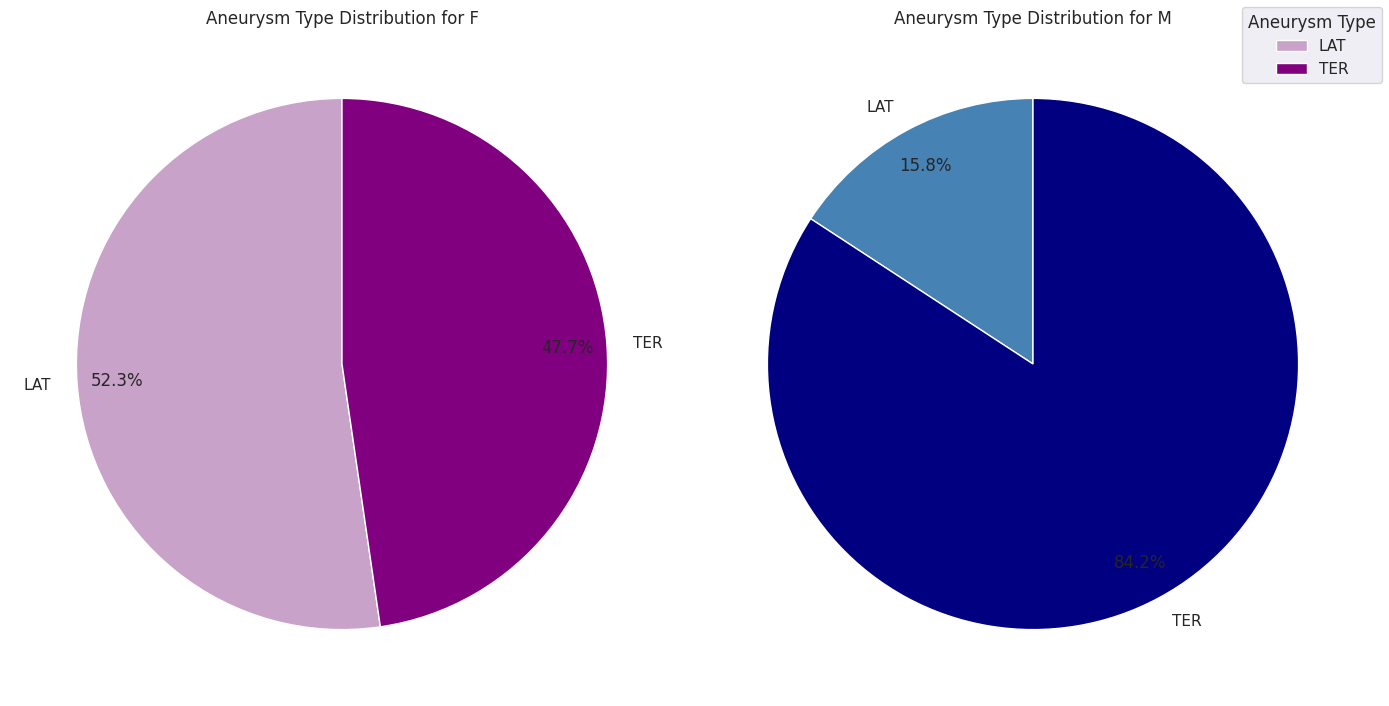

In [78]:

type_counts = df_complete.groupby(['sex', 'aneurysmType']).size().unstack(fill_value=0).reset_index()

# Define colors for each sex and aneurysm type
colors = {
    'F': ['#C8A2C8', '#800080'],  # Light blue, Dark blue
    'M': ['#4682B4', '#000080']   # Light orange, Dark orange
}


# Create a figure with subplots for each sex
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pie chart for each sex
for ax, (sex, data) in zip(axes, type_counts.set_index('sex').iterrows()):
    labels = data.index
    sizes = data.values
    # Select colors based on the sex
    selected_colors = colors[sex] * (len(sizes) // 2 + 1)
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=selected_colors[:len(sizes)],
        pctdistance=0.85
    )
    ax.set_title(f'Aneurysm Type Distribution for {sex}')
    ax.set_ylabel('')

# Add a single legend for the entire figure
fig.legend(labels=type_counts.columns[1:], loc='upper right', title='Aneurysm Type')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
#the values match the mean calculations above therefore this graph is accurate

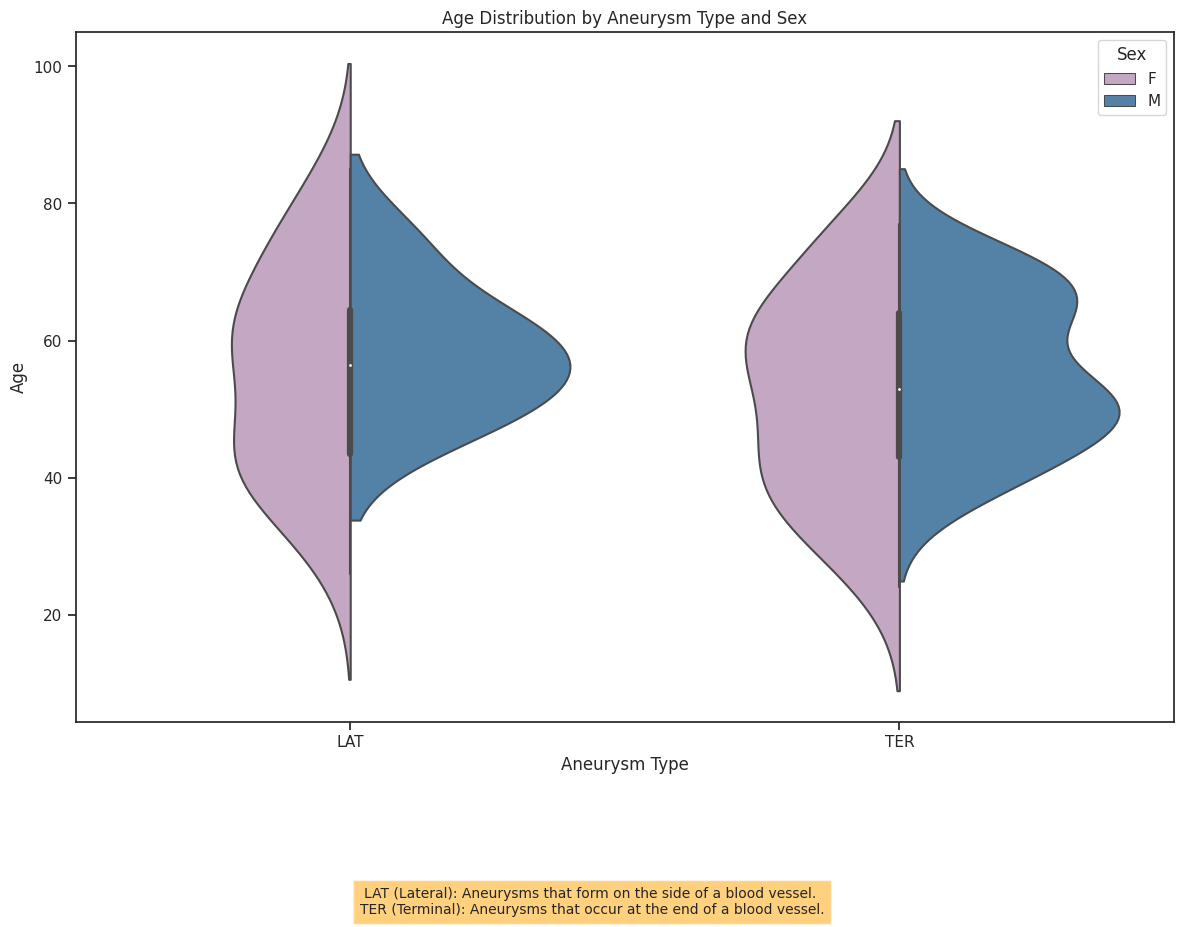

In [111]:
#investigating the age distribution of aneurysm type between the sexes

sns.set_style("ticks")
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'} 
plt.figure(figsize=(12, 8))
sns.violinplot(x='aneurysmType', y='age', hue='sex', data=df_complete, split=True, palette=sex_colors)
plt.title('Age Distribution by Aneurysm Type and Sex')
plt.xlabel('Aneurysm Type')
plt.ylabel('Age')
plt.legend(title='Sex')

# Add definitions for aneurysm locations
definitions = (
   'LAT (Lateral): Aneurysms that form on the side of a blood vessel. \n'
            'TER (Terminal): Aneurysms that occur at the end of a blood vessel.'
)
plt.figtext(0.5, -0.15, definitions, wrap=True, horizontalalignment='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

In [124]:
#investiating prevalence of multiple aneurysms between the sexes
female_multiple = female_data['multipleAneurysms'].value_counts(normalize=True).mul(100).round()
female_multiple

multipleAneurysms
False    82.0
True     18.0
Name: proportion, dtype: float64

In [125]:
male_multiple = male_data['multipleAneurysms'].value_counts(normalize=True).mul(100).round()
male_multiple

multipleAneurysms
False    87.0
True     13.0
Name: proportion, dtype: float64

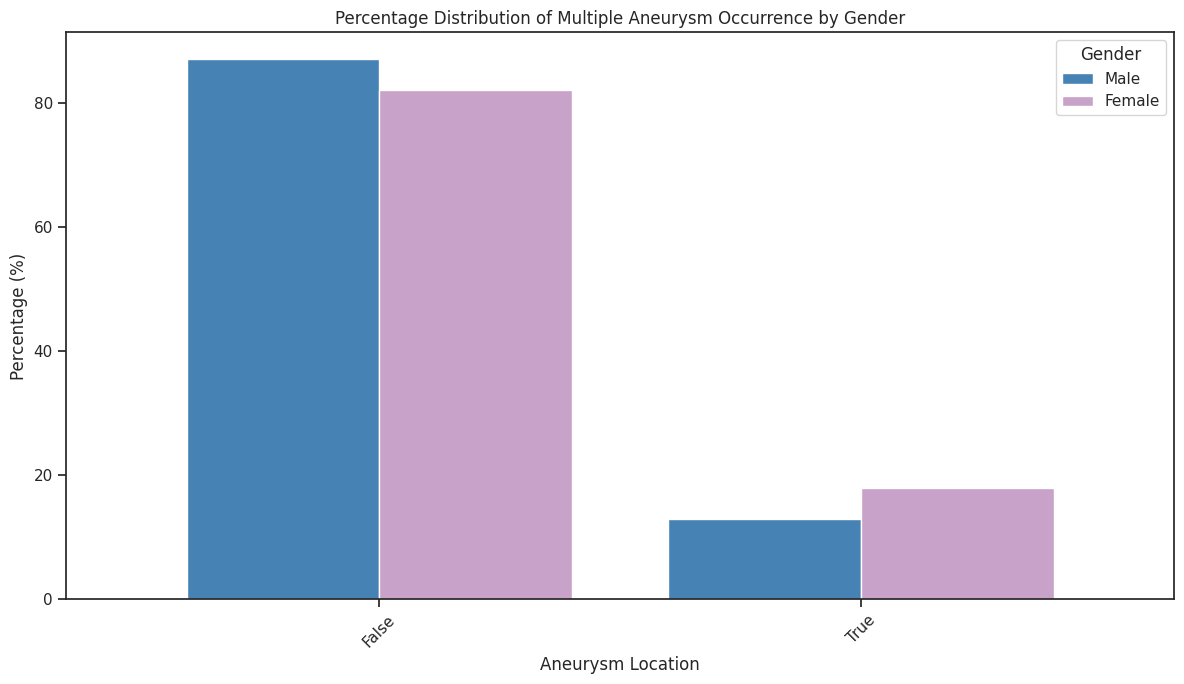

In [126]:
multiple_data = pd.DataFrame({
    'Male': male_multiple,
    'Female': female_multiple
}).fillna(0) 

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
multiple_data.plot(kind='bar', ax=ax, color=['#4682B4', '#C8A2C8'], width=0.8)  # Light blue and light purple

# Adding title and labels
plt.title('Percentage Distribution of Multiple Aneurysm Occurrence by Gender')
plt.xlabel('Aneurysm Location')
plt.ylabel('Percentage (%)')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
#since there isn't much difference between these, i dont see the point in using this insight for my presentation

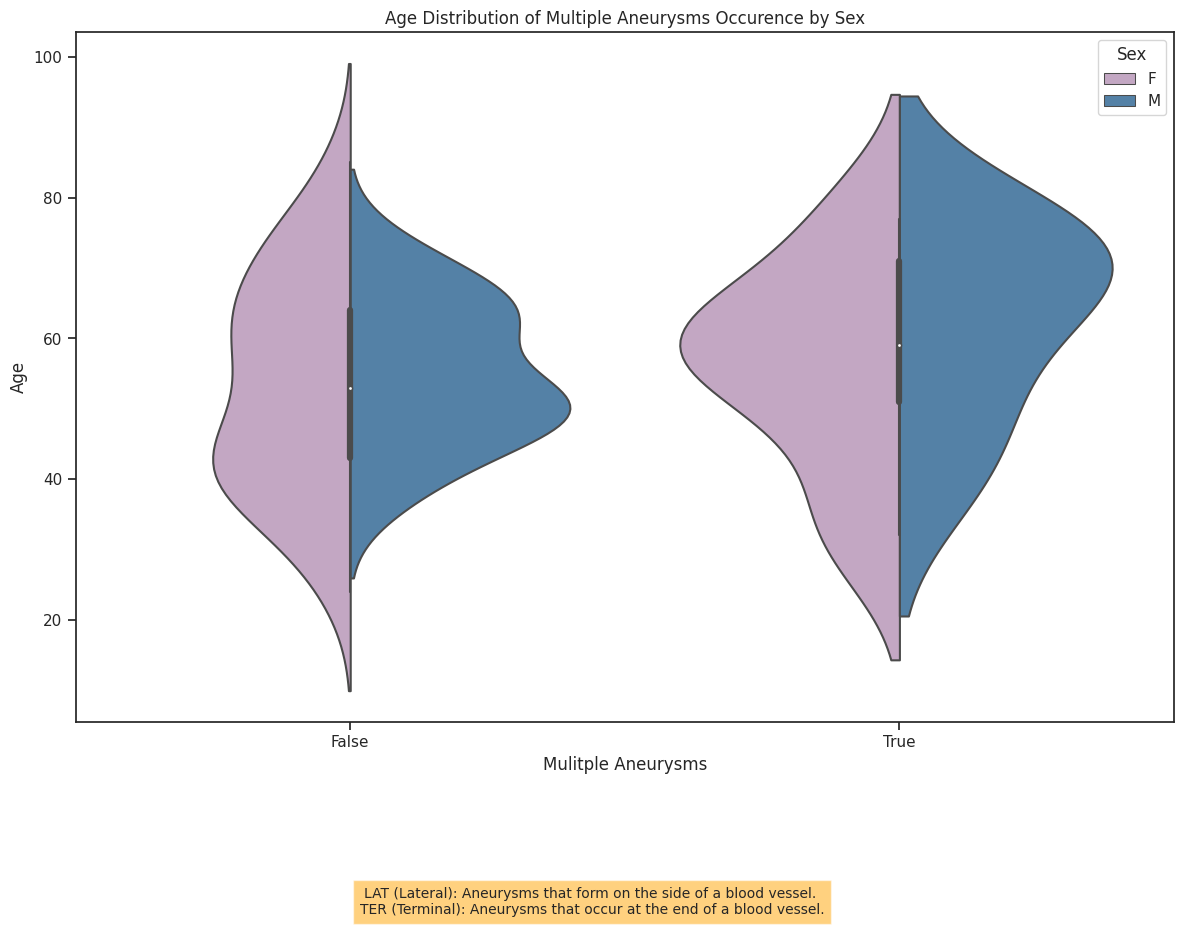

In [117]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='multipleAneurysms', y='age', hue='sex', data=df_complete, split=True, palette=sex_colors)
plt.title('Age Distribution of Multiple Aneurysms Occurence by Sex')
plt.xlabel('Mulitple Aneurysms')
plt.ylabel('Age')
plt.legend(title='Sex')

plt.figtext(0.5, -0.15, definitions, wrap=True, horizontalalignment='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

In [128]:
rupture_male = male_data['ruptureStatus'].value_counts(normalize=True).mul(100).round()
rupture_male

ruptureStatus
U    53.0
R    47.0
Name: proportion, dtype: float64

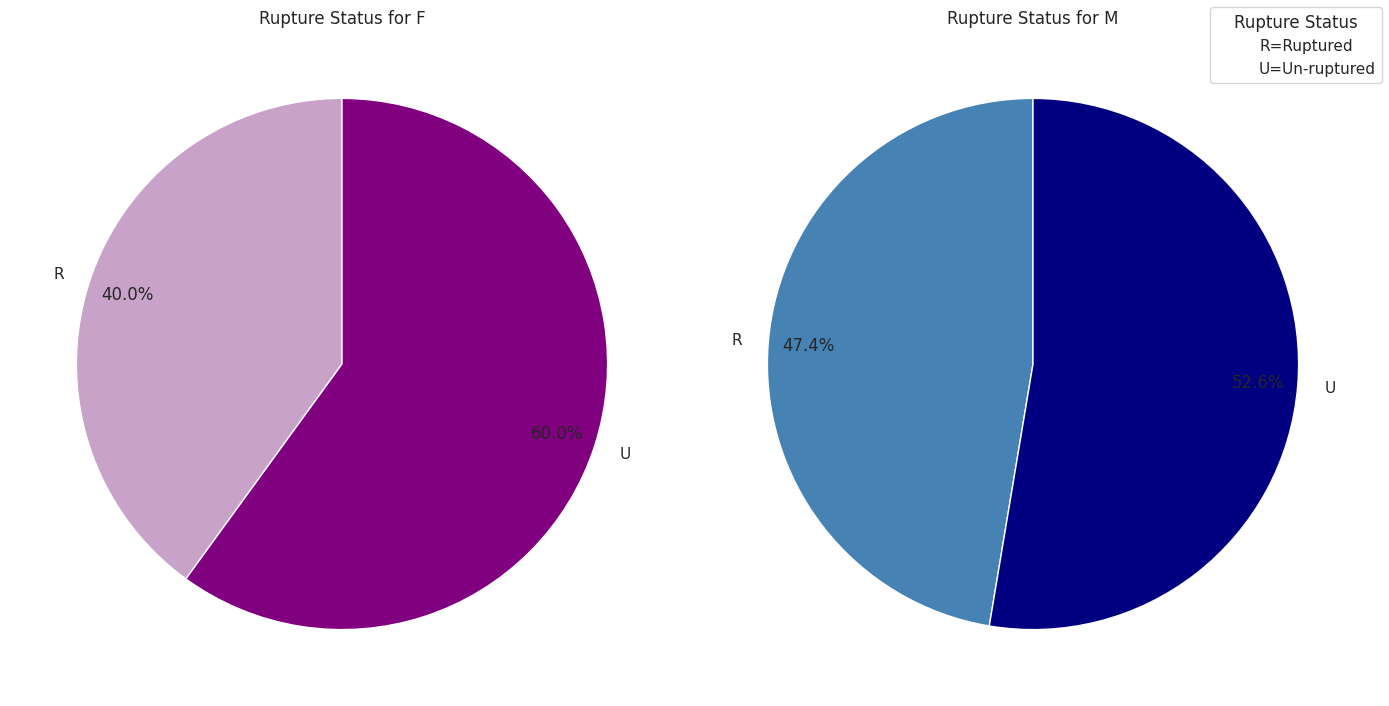

In [129]:
rupture_status = df_complete.groupby(['sex', 'ruptureStatus']).size().unstack(fill_value=0).reset_index()
# Define colors for each sex and aneurysm type
colors = {
    'F': ['#C8A2C8', '#800080'],  # Light blue, Dark blue
    'M': ['#4682B4', '#000080']   # Light orange, Dark orange
}

# Create a figure with subplots for each sex
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pie chart for each sex
for ax, (sex, data) in zip(axes, rupture_status.set_index('sex').iterrows()):
    labels = data.index
    sizes = data.values
    # Select colors based on the sex
    selected_colors = colors[sex] * (len(sizes) // 2 + 1)
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=selected_colors[:len(sizes)],
        pctdistance=0.85
    )
    ax.set_title(f'Rupture Status for {sex}')
    ax.set_ylabel('')

# Add a single legend for the entire figure
handles = [plt.Line2D([0], [0], color='none', marker='None', linestyle='None', label='R=Ruptured'),
           plt.Line2D([0], [0], color='none', marker='None', linestyle='None', label='U=Un-ruptured')]
fig.legend(handles=handles, loc='upper right', title='Rupture Status')


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

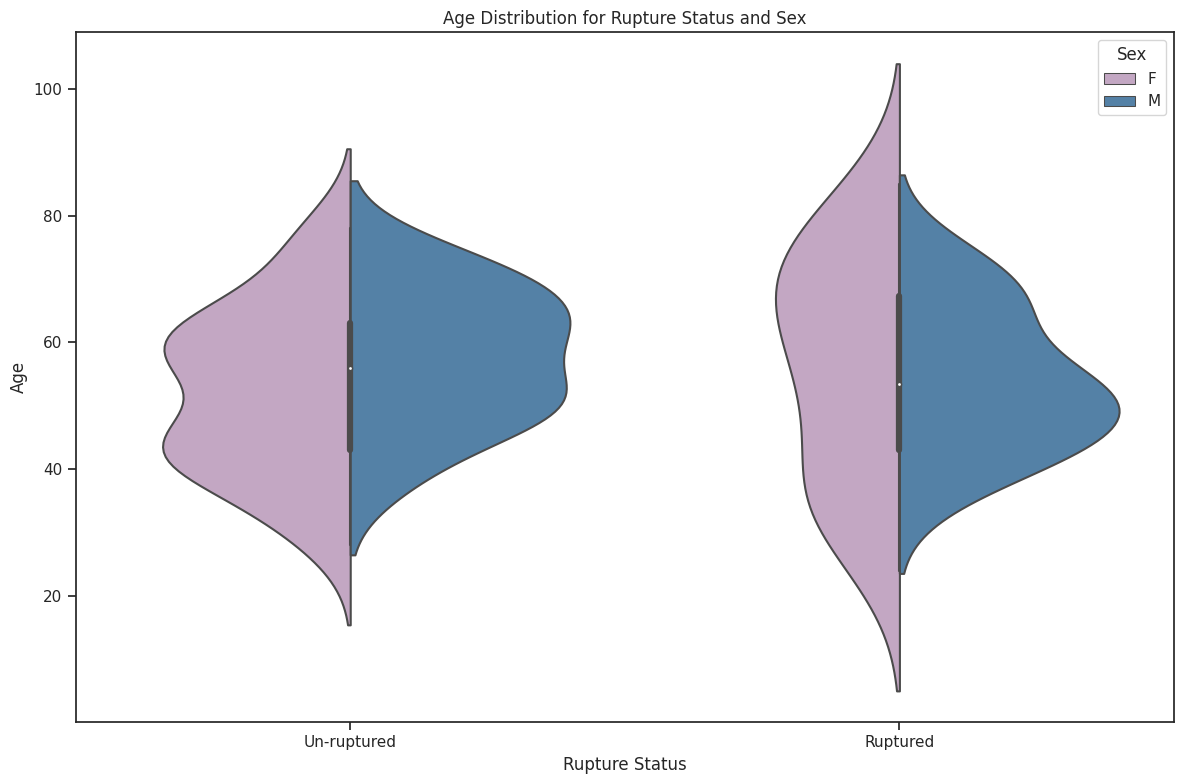

In [130]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='ruptureStatus', y='age', hue='sex', data=df_complete, split=True, palette=sex_colors)
plt.title('Age Distribution for Rupture Status and Sex')
plt.xlabel('Rupture Status')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.xticks(ticks=[0, 1], labels=['Un-ruptured', 'Ruptured'], rotation=0)
# Add definitions for aneurysm locations

plt.tight_layout()
plt.show()

In [141]:
female_rupture_status = female_data.groupby('ruptureStatus')['age'].mean().round()
female_rupture_status

ruptureStatus
R    56.0
U    52.0
Name: age, dtype: float64

In [142]:
male_rupture_status = male_data.groupby('ruptureStatus')['age'].mean().round()
male_rupture_status

ruptureStatus
R    54.0
U    58.0
Name: age, dtype: float64

In [217]:
#since there is not much difference in age for rupture status, it doesnt seem like a significant area to investigate

In [ ]:
#investigating haemodynamic and structural properties

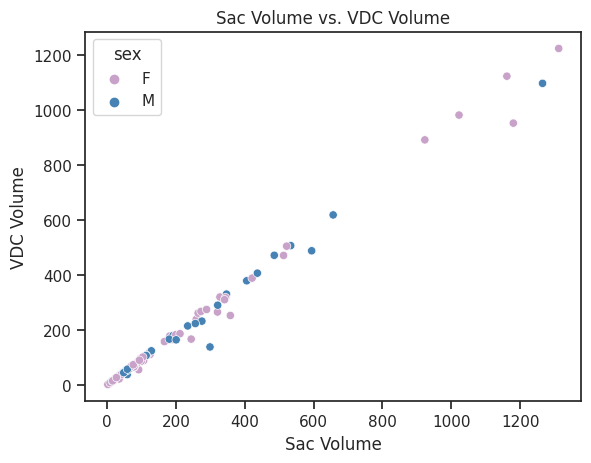

In [148]:
sns.scatterplot(x='sacVolume', y='vdcVolume', hue='sex', palette=sex_colors, data=df_complete, marker='o')

# Add axis labels and title
plt.xlabel('Sac Volume')
plt.ylabel('VDC Volume')
plt.title('Sac Volume vs. VDC Volume')

# Show the plot
plt.show()

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Sac Volume vs. Ostium Section Area')

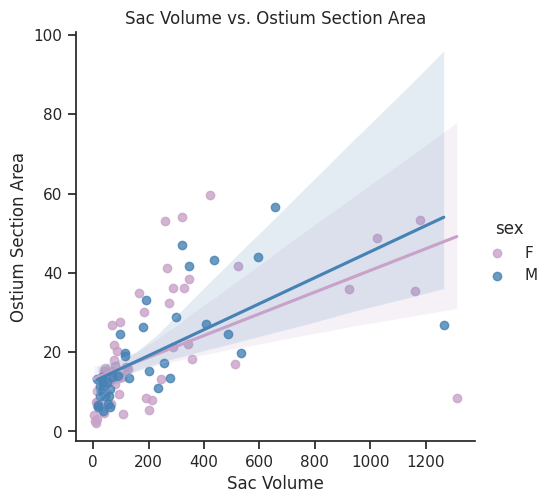

In [150]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")

sns.lmplot(x='sacVolume', y='ostiumSectionArea',data=df_complete,hue='sex', palette = sex_colors);

plt.xlabel('Sac Volume')
plt.ylabel('Ostium Section Area')
plt.title('Sac Volume vs. Ostium Section Area')


/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Sac Surface Area vs. Sac Section Area')

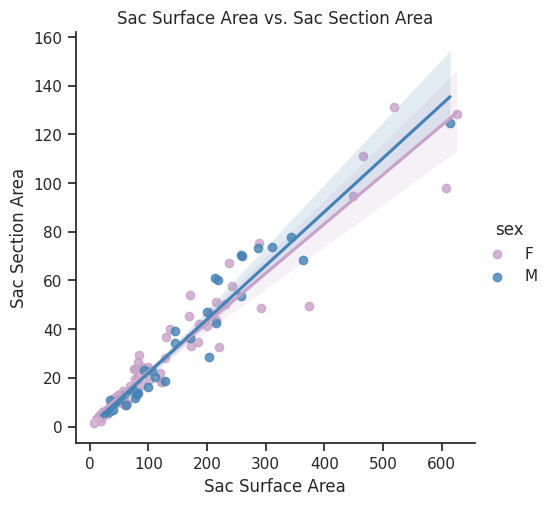

In [151]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")

sns.lmplot(x='sacSurfaceArea', y='sacSectionArea',data=df_complete,hue='sex', palette = sex_colors);

plt.xlabel('Sac Surface Area')
plt.ylabel('Sac Section Area')
plt.title('Sac Surface Area vs. Sac Section Area')

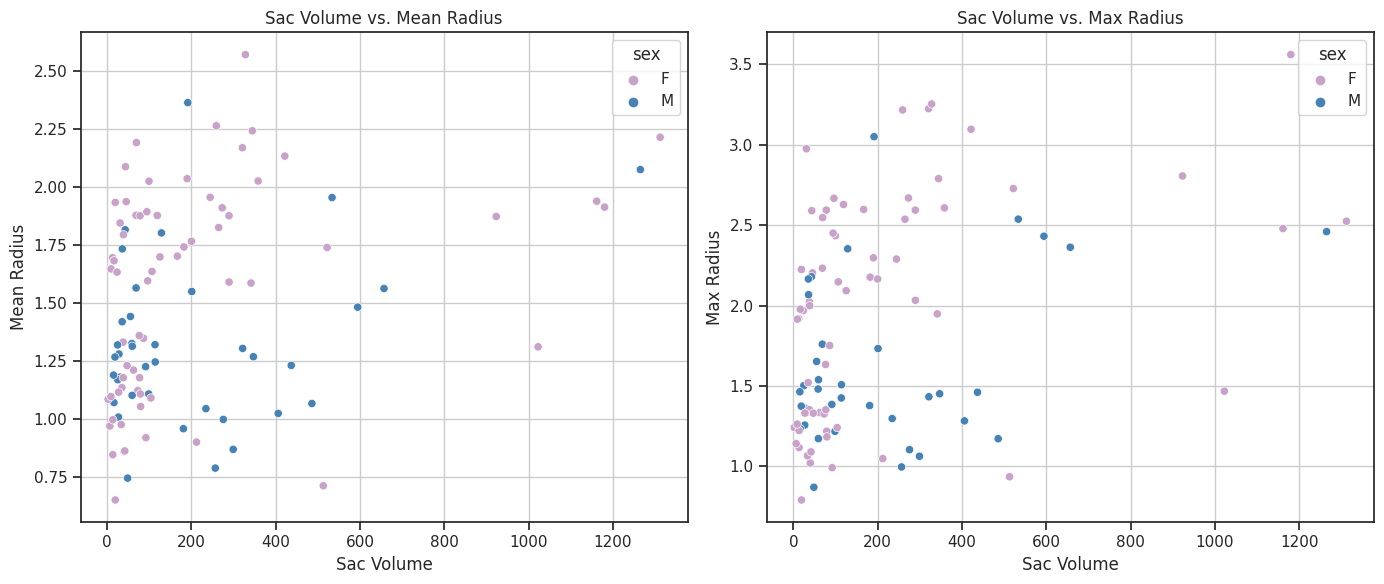

In [152]:

sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for sacVolume vs. meanRadius
sns.scatterplot(x='sacVolume', y='meanRadius', data=df_complete, hue='sex', palette=sex_colors, marker='o', ax=axs[0])
axs[0].set_xlabel('Sac Volume')
axs[0].set_ylabel('Mean Radius')
axs[0].set_title('Sac Volume vs. Mean Radius')
axs[0].grid(True)

# Scatter plot for sacVolume vs. maxRadius
sns.scatterplot(x='sacVolume', y='maxRadius', data=df_complete, hue='sex', palette=sex_colors, marker='o', ax=axs[1])
axs[1].set_xlabel('Sac Volume')
axs[1].set_ylabel('Max Radius')
axs[1].set_title('Sac Volume vs. Max Radius')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

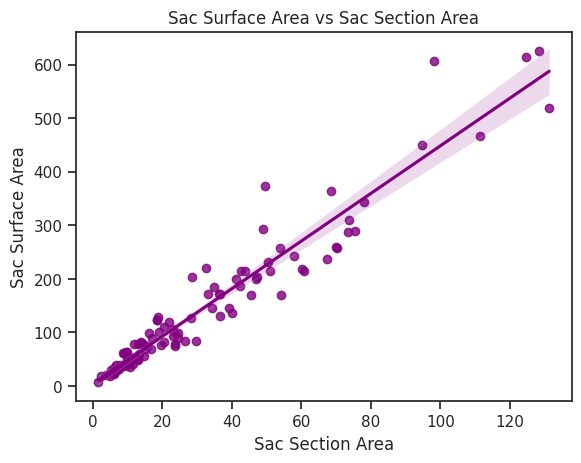

In [153]:
sns.regplot(x='sacSectionArea', y='sacSurfaceArea',color ='purple', data=df_complete)
plt.title('Sac Surface Area vs Sac Section Area')
plt.xlabel('Sac Section Area')
plt.ylabel('Sac Surface Area');

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


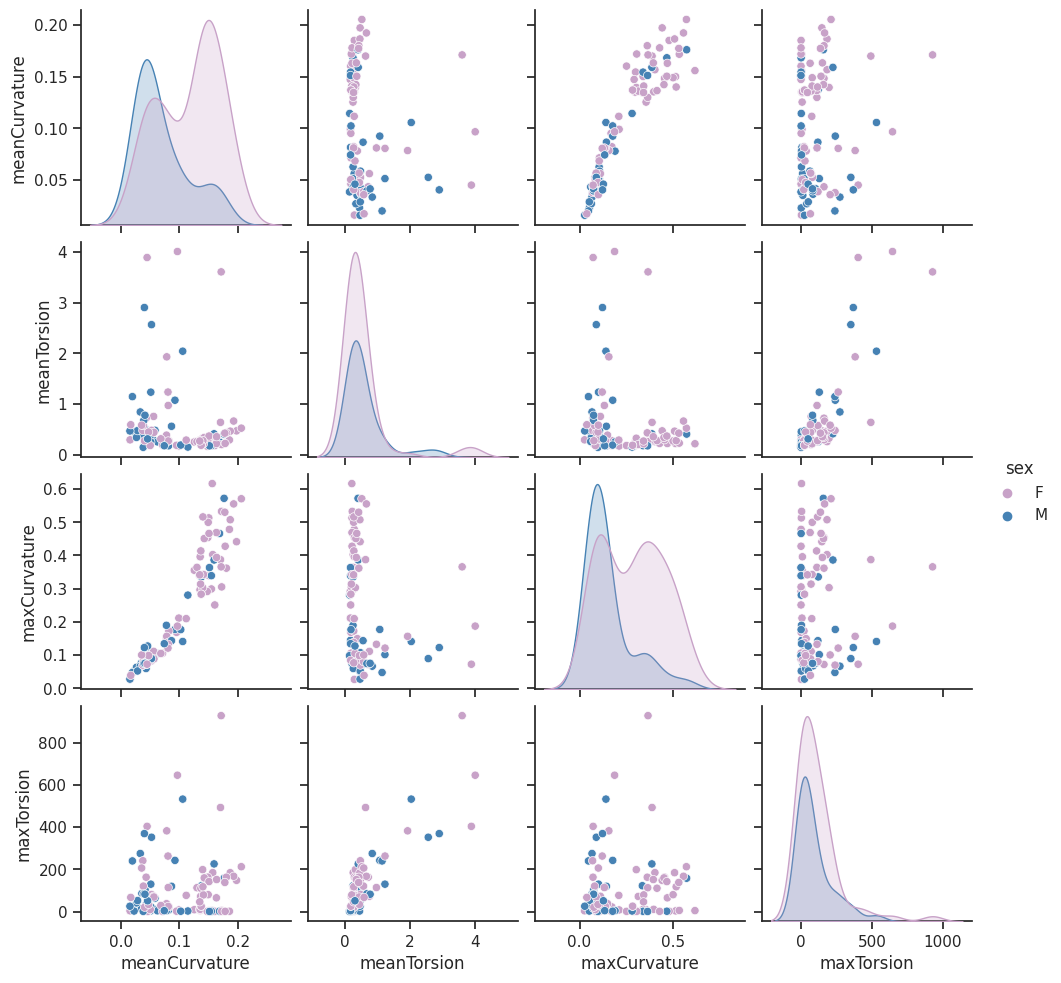

In [155]:
sns.pairplot(df_complete, vars=['meanCurvature', 'meanTorsion', 'maxCurvature', 'maxTorsion'], hue='sex', palette=sex_colors)

# Display the plot
plt.show()

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


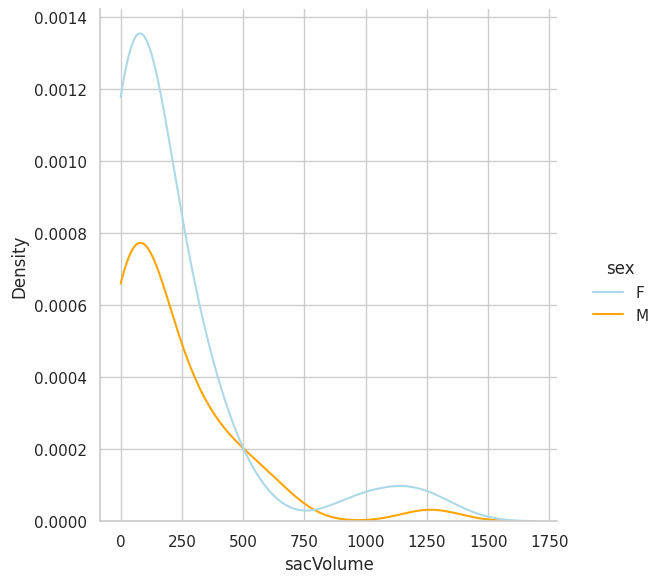

In [156]:

sns.set_theme(style="whitegrid")

custom_palette = {"F": "lightblue", "M": "orange"}

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df_complete,
    x="sacVolume", hue="sex",
    kind="kde", height=6,
    multiple="layer", clip=(0, None),
    palette=custom_palette,
)

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


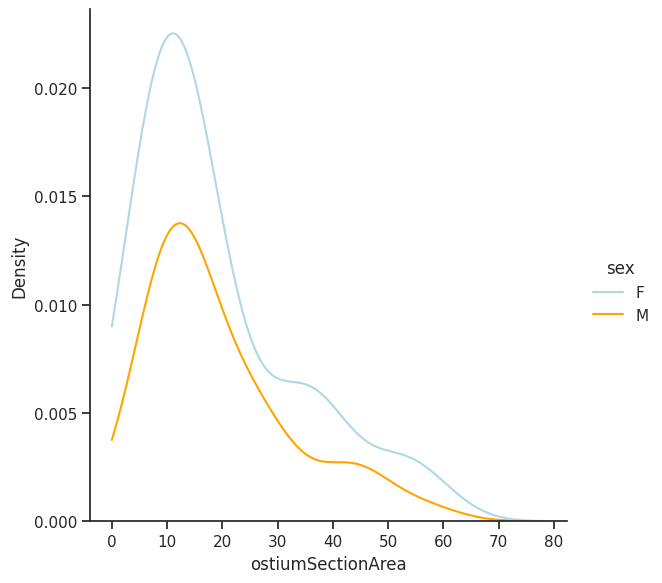

In [157]:
sns.set_style("ticks")
sns.displot(
    data=df_complete,
    x="ostiumSectionArea", hue="sex",
    kind="kde", height=6,
    multiple="layer", clip=(0, None),
    palette=custom_palette,
)

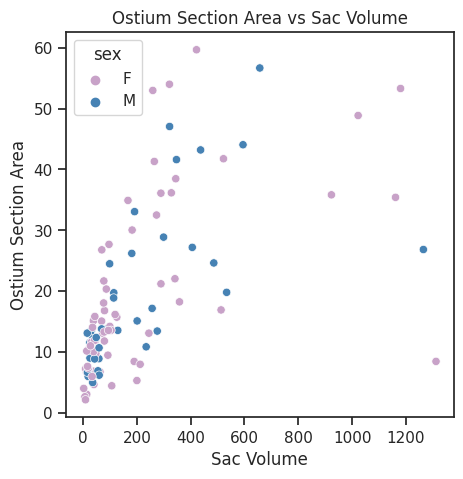

In [158]:
g = sns.scatterplot(
    data=df_complete,
    x="sacVolume", y="ostiumSectionArea", hue="sex", palette=sex_colors,
)

# Set axis labels
g.set_xlabel("Sac Volume")
g.set_ylabel("Ostium Section Area")
g.set_title("Ostium Section Area vs Sac Volume")
# Adjust plot size
plt.gcf().set_size_inches(5, 5)

plt.show()

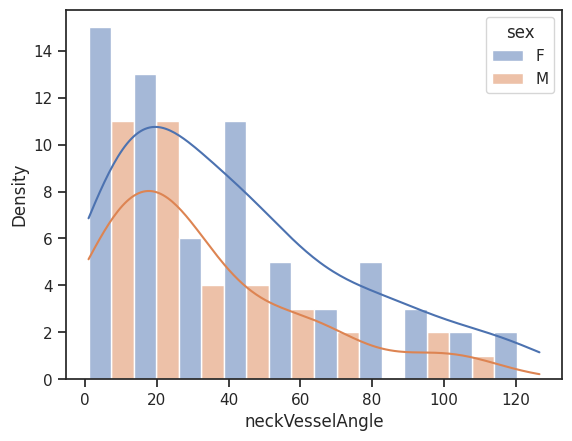

In [159]:
sns.histplot(
    data=df_complete, 
    x='neckVesselAngle', 
    bins=int(len(df_complete)/10), 
    hue='sex',
    multiple='dodge',
    kde=True
)

# Add axis titles
plt.xlabel('neckVesselAngle')
plt.ylabel('Density')
plt.title('')

# Show the plot
plt.show()

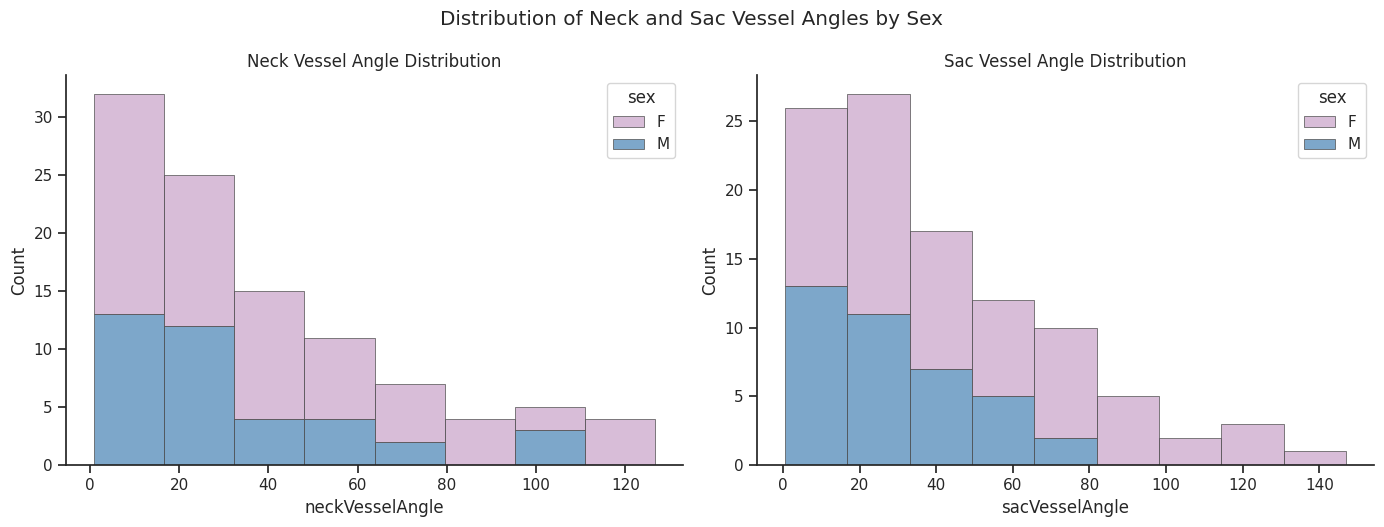

In [160]:
import matplotlib.ticker as ticker 
sns.set_theme(style="ticks")
f, axes = plt.subplots(1, 2, figsize=(14, 5))

# First histogram for neckVesselAngle
sns.histplot(
    data=df_complete,
    x="neckVesselAngle", hue="sex",
    multiple="stack",
    palette=sex_colors,
    edgecolor=".3",
    linewidth=.5,
    ax=axes[0],
    alpha=0.7
)
axes[0].set_title('Neck Vessel Angle Distribution')
axes[0].xaxis.set_major_formatter(ticker.ScalarFormatter())


# Second histogram for anotherVariable
sns.histplot(
    data=df_complete,
    x="sacVesselAngle", hue="sex",
    multiple="stack",
    palette=sex_colors,
    edgecolor=".3",
    linewidth=.5,
    ax=axes[1],
    alpha=0.7
)
axes[1].set_title('Sac Vessel Angle Distribution')
axes[1].xaxis.set_major_formatter(ticker.ScalarFormatter())


# Adjust layout and show the plot
plt.tight_layout()
sns.despine(f)
plt.suptitle('Distribution of Neck and Sac Vessel Angles by Sex', y=1.05)
plt.show()

In [161]:
male_data['sacVesselAngle'].describe()

count    38.000000
mean     28.563545
std      20.758118
min       1.189527
25%       8.732375
50%      28.603747
75%      39.863422
max      77.707586
Name: sacVesselAngle, dtype: float64

In [162]:
female_data['sacVesselAngle'].describe()

count     65.000000
mean      47.006904
std       35.231298
min        0.561933
25%       21.200566
50%       39.670568
75%       69.192147
max      146.971872
Name: sacVesselAngle, dtype: float64

In [163]:
female_data['neckVesselAngle'].describe()

count     65.000000
mean      41.346243
std       32.380914
min        1.604829
25%       13.897533
50%       36.576431
75%       58.370652
max      126.649505
Name: neckVesselAngle, dtype: float64

In [164]:
male_data['neckVesselAngle'].describe()

count     38.000000
mean      32.651134
std       27.922918
min        0.961829
25%       12.600590
50%       24.595788
75%       44.148213
max      108.315743
Name: neckVesselAngle, dtype: float64

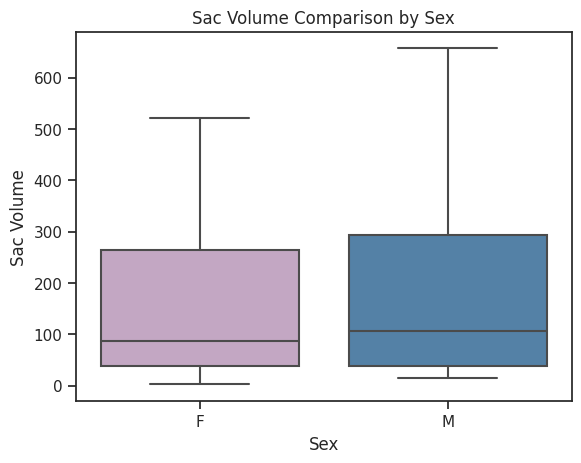

In [166]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}

sns.boxplot(y="sacVolume", x = 'sex', palette=sex_colors,showfliers=False,
            data=df_complete)
plt.xlabel('Sex')
plt.ylabel('Sac Volume')
plt.title('Sac Volume Comparison by Sex')
plt.show()

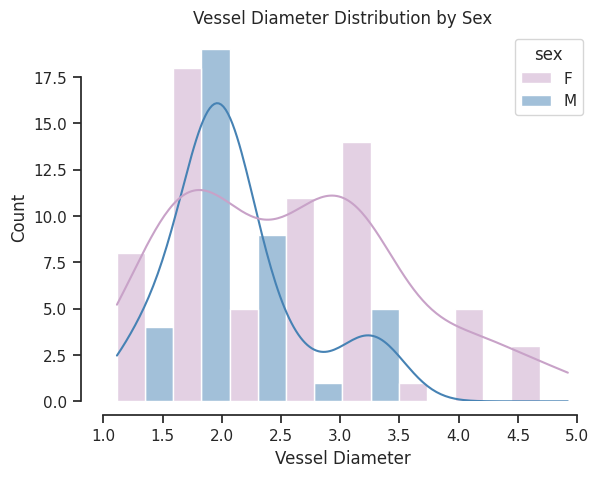

In [167]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")
sns.histplot(x="vesselDiameter", hue="sex", palette=sex_colors, multiple='dodge',
    kde=True, data=df_complete)

sns.despine(offset=10, trim=True)

plt.xlabel('Vessel Diameter')
plt.ylabel('Count')
plt.title('Vessel Diameter Distribution by Sex')
plt.show()

In [168]:
male_data['vesselDiameter'].describe()

count    38.000000
mean      2.115365
std       0.550687
min       1.251697
25%       1.830196
50%       2.002257
75%       2.157765
max       3.374811
Name: vesselDiameter, dtype: float64

In [169]:
female_data['vesselDiameter'].describe()

count    65.000000
mean      2.597898
std       0.942404
min       1.114847
25%       1.787183
50%       2.604831
75%       3.214056
max       4.922260
Name: vesselDiameter, dtype: float64

In [170]:
male_data['sacVolume'].describe()

count      38.000000
mean      207.476107
std       251.269382
min        15.378395
25%        37.717618
50%       106.162785
75%       293.268930
max      1265.091454
Name: sacVolume, dtype: float64

In [171]:
female_data['sacVolume'].describe()

count      65.000000
mean      207.873641
std       296.494555
min         2.339496
25%        38.275152
50%        86.226352
75%       264.735910
max      1312.025948
Name: sacVolume, dtype: float64

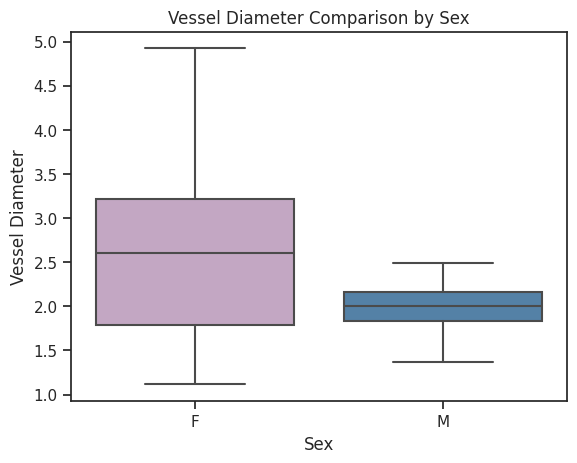

In [172]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}

sns.boxplot(y="vesselDiameter", x = 'sex', palette=sex_colors,showfliers=False,
            data=df_complete)
plt.xlabel('Sex')
plt.ylabel('Vessel Diameter')
plt.title('Vessel Diameter Comparison by Sex')
plt.show()

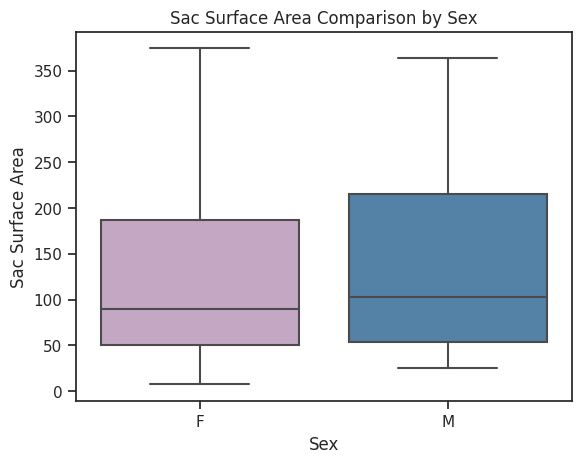

In [174]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")
sns.boxplot(y="sacSurfaceArea", x = 'sex', palette=sex_colors,showfliers=False,
            data=df_complete)
plt.xlabel('Sex')
plt.ylabel('Sac Surface Area')
plt.title('Sac Surface Area Comparison by Sex')
plt.show()

In [175]:
df_complete.groupby('sex')['sacSurfaceArea'].mean().round()

sex
F    143.0
M    148.0
Name: sacSurfaceArea, dtype: float64

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Sac Volume vs. Mean Curvature')

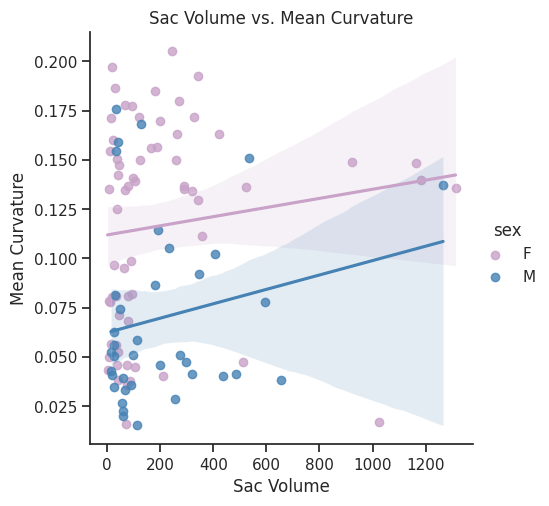

In [177]:
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")

sns.lmplot(x='sacVolume', y='meanCurvature',data=df_complete,hue='sex', palette = sex_colors);

plt.xlabel('Sac Volume')
plt.ylabel('Mean Curvature')
plt.title('Sac Volume vs. Mean Curvature')

In [178]:
df_complete.groupby('sex')['meanCurvature'].mean()

sex
F    0.116748
M    0.069946
Name: meanCurvature, dtype: float64

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Aspect Ratio vs Size Ratio')

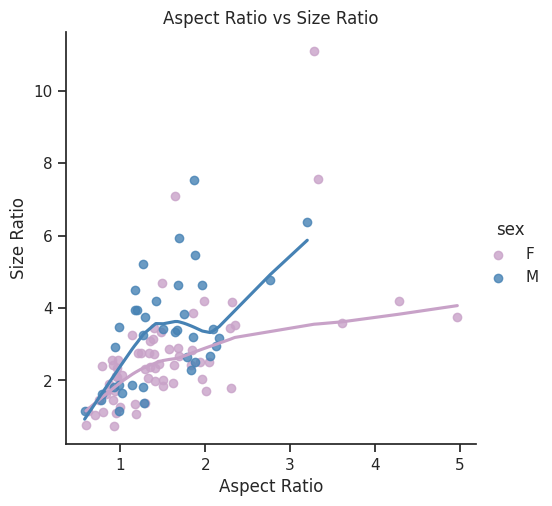

In [179]:

    
sex_colors = {'M': '#4682B4', 'F': '#C8A2C8'}
sns.set_style("ticks")

sns.lmplot(x='aspectRatio_star', y='sizeRatio_star',data=df_complete,hue='sex', palette = sex_colors, lowess=True);

plt.xlabel('Aspect Ratio')
plt.ylabel('Size Ratio')
plt.title('Aspect Ratio vs Size Ratio')

In [180]:
df_complete.groupby('sex')['aspectRatio_star'].mean()

sex
F    1.546857
M    1.522168
Name: aspectRatio_star, dtype: float64

In [181]:
df_complete.groupby('sex')['sizeRatio_star'].mean()

sex
F    2.679243
M    3.351408
Name: sizeRatio_star, dtype: float64

In [183]:
df_complete.groupby('sex')['maxTorsion'].mean()

sex
F    112.628375
M     92.130671
Name: maxTorsion, dtype: float64

/kas/python_stacks/python_311_data_science/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Max Torsion by Sex')

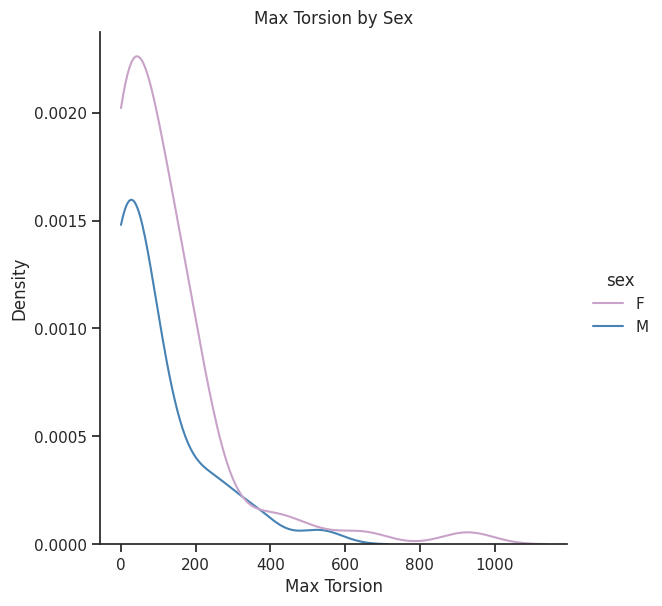

In [184]:
sns.set_style("ticks")
sns.displot(
    data=df_complete,
    x="maxTorsion", hue="sex",
    kind="kde", height=6,
    multiple="layer", clip=(0, None),
    palette=sex_colors,
)
plt.xlabel('Max Torsion')
plt.ylabel('Density')
plt.title('Max Torsion by Sex')

In [185]:
df_complete.groupby('sex')['sacSectionArea'].mean()

sex
F    31.159395
M    32.619118
Name: sacSectionArea, dtype: float64